# Tumor immune microenvironments ST dataset simulation

In this tutorial, we showcased the application of Spider in generating tumor samples with different immune microenvironments (TIME). Previous studies have shown that different tumor cells secrete various cytokines and chemokines, creating a local immune microenvironment by recruiting different types and amounts of immune cells. The spatial organization of immune phenotypes can be classified into three categories: cold, mixed, and compartmentalized. Immune cold tumors exhibit few infiltrating immune cells, mainly macrophages. In contrast, mixed tumors have numerous immune cells intermixed with tumor cells. Compartmentalized tumors have a high proportion of immune cells, but these cells are spatially segregated from tumor cells.
    We utilized Spider to simulate these three types of TIME data by setting appropriate cell type proportions and transition matrices. 

In [2]:
import spider as sp
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import itertools
import anndata as ad

In [16]:
sc.set_figure_params( color_map = 'viridis',figsize=(5,5))

## Cold

In [4]:
## Cold    
Num_sample = 2500
Num_celltype = 4
prior = np.array([0.97,0.01,0.01,0.01])   
Num_ct_sample = sp.get_ct_sample(Num_celltype = Num_celltype, Num_sample =  Num_sample, prior = prior)
target_trans = sp.addictive_freq(Num_celltype)
target_trans[1,:] =  np.repeat(0.25,4)
target_trans[2,:] =  np.repeat(0.25,4)
target_trans[3,:] =  np.repeat(0.25,4)
target_trans

array([[0.8       , 0.06666667, 0.06666667, 0.06666667],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      ]])

In [5]:
res, cell_location = sp.simulate_10X(cell_num=Num_sample,
                                  Num_celltype=Num_celltype,
                                  prior=prior,
                                  target_trans=target_trans,
                                  spot_radius=None,
                                  spot_min=None,
                                  spot_max=None,
                                  image_width=10,
                                  image_height=10,
                                  cell_location=None,
                                  tol=2e-2,
                                  T=1e-2,
                                  loop_times=None,
                                  smallsample_max_iter=150000,
                                  bigsample_max_iter=10000)


swap_num:  1
Refine cell type using Metropolis–Hastings algorithm.
Sample num:2500
10000 iteration, error 1.325
20000 iteration, error 1.326
30000 iteration, error 1.332
40000 iteration, error 1.325
50000 iteration, error 1.312
60000 iteration, error 1.319
70000 iteration, error 1.306
80000 iteration, error 1.309
90000 iteration, error 1.306
100000 iteration, error 1.306
110000 iteration, error 1.312
120000 iteration, error 1.319
130000 iteration, error 1.306
140000 iteration, error 1.306
150000 iteration, error 1.309


In [9]:
spider_adata = ad.AnnData(
    X=np.zeros((len(res), 1)),  
    obs={'cell_type': res},      
    obsm={'spatial': cell_location} 
)


In [13]:
spider_adata.obs.cell_type = spider_adata.obs.cell_type.astype("category")

In [14]:
spider_adata.obs["x"] = spider_adata.obsm["spatial"][:,0]
spider_adata.obs["y"] = spider_adata.obsm["spatial"][:,1]

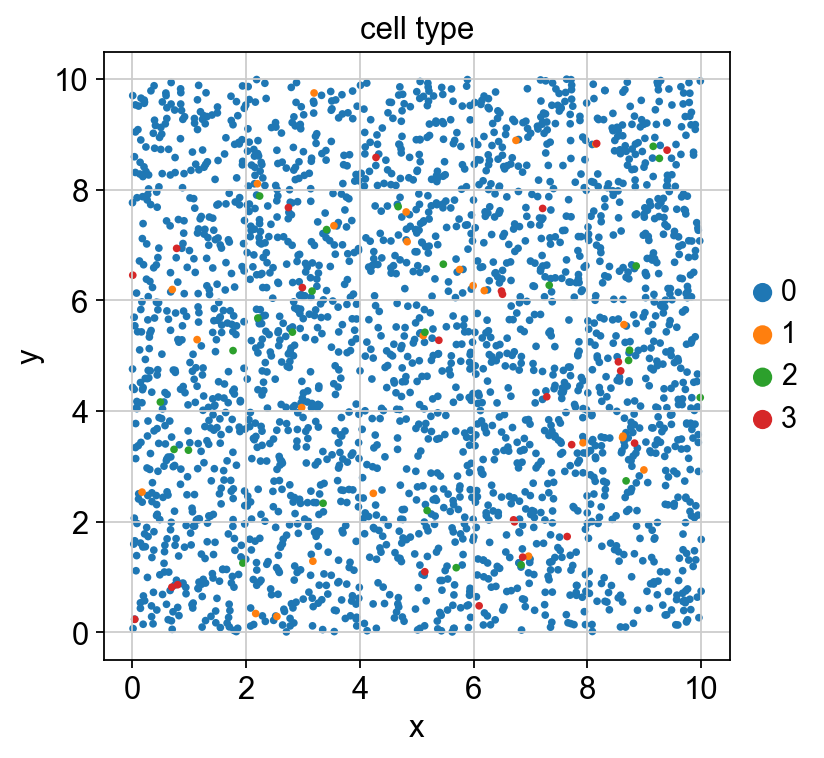

In [17]:
sc.pl.scatter(spider_adata,color="cell_type",x="x",y="y")

## Mixed

In [19]:
## Mixed
prior = np.array([0.01,0.33,0.33,0.33]) 
Num_ct_sample = sp.get_ct_sample(Num_celltype = Num_celltype, Num_sample = Num_sample , prior = prior)
target_trans = sp.stripe_freq(Num_celltype)
target_trans[3,:] = np.array([0.45,0.05,0.05,0.45])
target_trans

array([[0.45, 0.45, 0.05, 0.05],
       [0.05, 0.45, 0.45, 0.05],
       [0.05, 0.05, 0.45, 0.45],
       [0.45, 0.05, 0.05, 0.45]])

In [20]:
res, cell_location = sp.simulate_10X(cell_num=Num_sample,
                                  Num_celltype=Num_celltype,
                                  prior=prior,
                                  target_trans=target_trans,
                                  spot_radius=None,
                                  spot_min=None,
                                  spot_max=None,
                                  image_width=10,
                                  image_height=10,
                                  cell_location=None,
                                  tol=2e-2,
                                  T=1e-2,
                                  loop_times=None,
                                  smallsample_max_iter=150000,
                                  bigsample_max_iter=10000)


swap_num:  1
Refine cell type using Metropolis–Hastings algorithm.
Sample num:2500
10000 iteration, error 0.804
20000 iteration, error 0.796
30000 iteration, error 0.785
40000 iteration, error 0.794
50000 iteration, error 0.794
60000 iteration, error 0.771
70000 iteration, error 0.789
80000 iteration, error 0.789
90000 iteration, error 0.792
100000 iteration, error 0.793
110000 iteration, error 0.793
120000 iteration, error 0.795
130000 iteration, error 0.795
140000 iteration, error 0.786
150000 iteration, error 0.793


In [26]:
spider_adata = ad.AnnData(
    X=np.zeros((len(res), 1)),  
    obs={'cell_type': res},      
    obsm={'spatial': cell_location} 
)


In [27]:
spider_adata.obs.cell_type = spider_adata.obs.cell_type.astype("category")

In [28]:
spider_adata.obs["x"] = spider_adata.obsm["spatial"][:,0]
spider_adata.obs["y"] = spider_adata.obsm["spatial"][:,1]

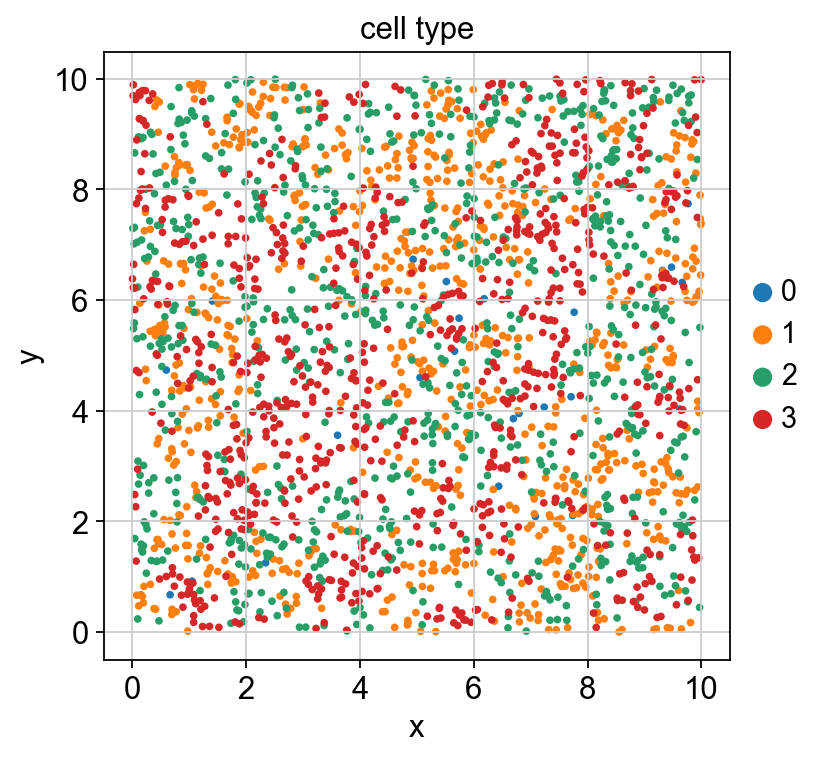

In [29]:
sc.pl.scatter(spider_adata,color="cell_type",x="x",y="y")

## Compartmentalized

In [31]:
## Compartmentalized
prior = np.array([0.80,0.03,0.02,0.15]) 
Num_ct_sample = sp.get_ct_sample(Num_celltype = Num_celltype, Num_sample =  Num_sample, prior = prior)
target_trans = sp.addictive_freq(Num_celltype)
target_trans[1,:] = np.array([0.01,0.33,0.33,0.33])
target_trans[2,:] = np.array([0.01,0.33,0.33,0.33])
target_trans[3,:] = sp.addictive_freq(Num_celltype)[3,:]
target_trans

array([[0.8       , 0.06666667, 0.06666667, 0.06666667],
       [0.01      , 0.33      , 0.33      , 0.33      ],
       [0.01      , 0.33      , 0.33      , 0.33      ],
       [0.06666667, 0.06666667, 0.06666667, 0.8       ]])

In [32]:
res, cell_location = sp.simulate_10X(cell_num=Num_sample,
                                  Num_celltype=Num_celltype,
                                  prior=prior,
                                  target_trans=target_trans,
                                  spot_radius=None,
                                  spot_min=None,
                                  spot_max=None,
                                  image_width=10,
                                  image_height=10,
                                  cell_location=None,
                                  tol=2e-2,
                                  T=1e-2,
                                  loop_times=None,
                                  smallsample_max_iter=150000,
                                  bigsample_max_iter=10000)


swap_num:  1
Refine cell type using Metropolis–Hastings algorithm.
Sample num:2500
10000 iteration, error 0.696
20000 iteration, error 0.552
30000 iteration, error 0.514
40000 iteration, error 0.462
50000 iteration, error 0.476
60000 iteration, error 0.474
70000 iteration, error 0.467
80000 iteration, error 0.465
90000 iteration, error 0.467
100000 iteration, error 0.468
110000 iteration, error 0.474
120000 iteration, error 0.467
130000 iteration, error 0.472
140000 iteration, error 0.474
150000 iteration, error 0.475


In [33]:
spider_adata = ad.AnnData(
    X=np.zeros((len(res), 1)),  
    obs={'cell_type': res},      
    obsm={'spatial': cell_location} 
)


In [34]:
spider_adata.obs.cell_type = spider_adata.obs.cell_type.astype("category")

In [35]:
spider_adata.obs["x"] = spider_adata.obsm["spatial"][:,0]
spider_adata.obs["y"] = spider_adata.obsm["spatial"][:,1]

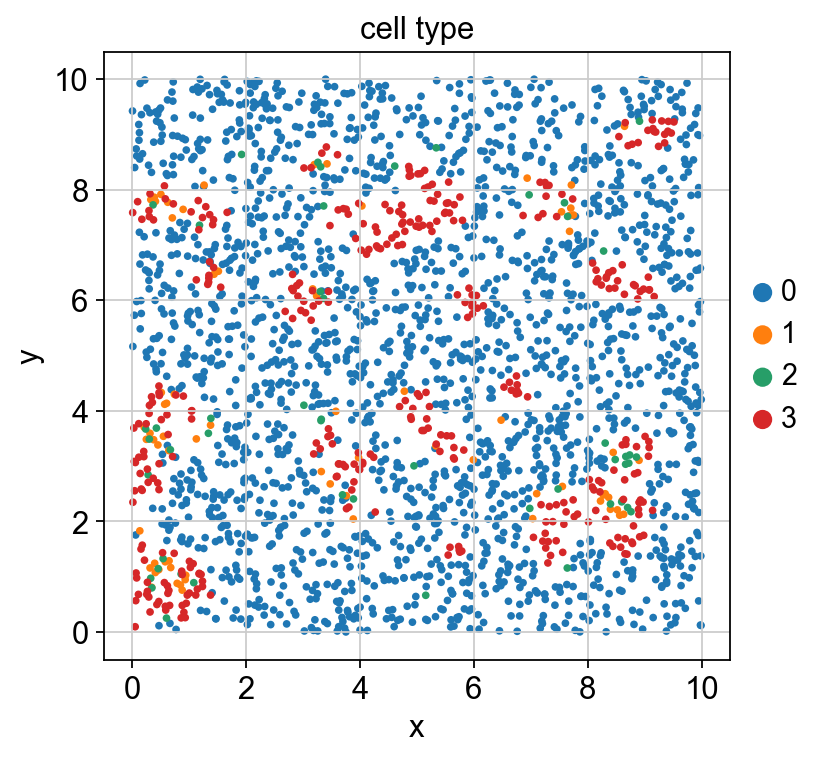

In [36]:
sc.pl.scatter(spider_adata,color="cell_type",x="x",y="y")